# An introduction to `relatio`
**Runtime $\sim$ 20min**

Original paper: ["Text Semantics Capture Political and Economic Narratives"](https://arxiv.org/abs/2108.01720)

----------------------------

This is a short demo of the package `relatio`.  It takes as input a text corpus and outputs a list of narrative statements. The pipeline is unsupervised: the user does not need to specify narratives beforehand. Narrative statements are defined as tuples of semantic roles with a (agent, verb, patient) structure.

Here, we present the main functions to quickly obtain narrative statements from a corpus.

----------------------------

In this tutorial, we work with the Trump Tweet Archive corpus.

----------------------------

In [1]:
pip install wheel setuptools

In [2]:
pip install relatio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 464.5/464.5 kB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 756.0/756.0 kB 32.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 58.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 171.5/171.5 kB 18.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 776.3/776.3 MB 732.8 kB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.8/56.8 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.4/54.4 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 542.0/542.0 kB 51.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 730.2/730.2 kB 54.7 MB/s eta 0:00:00
  Usin

In [6]:
pip install -U spacy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 15.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 922.3/922.3 kB 17.2 MB/s eta 0:00:00
  Attempting uninstall: thinc
    Found existing installation: thinc 8.0.17
    Uninstalling thinc-8.0.17:
      Successfully uninstalled thinc-8.0.17
  Attempting uninstall: spacy
    Found existing installation: spacy 3.3.3
    Uninstalling spacy-3.3.3:
      Successfully uninstalled spacy-3.3.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
allennlp 2.10.1 requires spacy<3.4,>=2.1.0, but you have spacy 3.7.4 which is incompatible.


In [3]:
!python -m spacy download en_core_web_sm


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 28.4 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [4]:
# Catch warnings for an easy ride
from relatio import FileLogger
logger = FileLogger(level = 'WARNING')

In [5]:
from relatio import load_data
df = load_data(dataset = "trump_tweet_archive", content = "raw")

In [6]:
from relatio import Preprocessor

p = Preprocessor(
    spacy_model = "en_core_web_sm",
    remove_punctuation = True,
    remove_digits = True,
    lowercase = True,
    lemmatize = True,
    remove_chars = ["\"",'-',"^",".","?","!",";","(",")",",",":","\'","+","&","|","/","{","}",
                    "~","_","`","[","]",">","<","=","*","%","$","@","#","’"],
    stop_words = [],
    n_process = -1,
    batch_size = 100
)

In [7]:
df = p.split_into_sentences(
    df, output_path = None, progress_bar = True
)

Splitting into sentences...


  0%|          | 0/32323 [00:00<?, ?it/s]WARNING:py.warnings:/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()

100%|██████████| 32323/32323 [02:17<00:00, 235.30it/s]


In [8]:
from relatio import SRL

SRL = SRL(
    path = "https://storage.googleapis.com/allennlp-public-models/openie-model.2020.03.26.tar.gz",
    batch_size = 10,
    cuda_device = -1
)

srl_res = SRL(df['sentence'][0:1000], progress_bar=True)

from relatio import extract_roles

roles, sentence_index = extract_roles(
    srl_res,
    used_roles = ["ARG0","B-V","B-ARGM-NEG","B-ARGM-MOD","ARG1","ARG2"],
    only_triplets = True,
    progress_bar = True
)

for d in roles[0:20]: print(d)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


Output()

Running SRL...


100%|██████████| 100/100 [01:06<00:00,  1.51it/s]


Extracting semantic roles...


100%|██████████| 1000/1000 [00:00<00:00, 17498.94it/s]

{'ARG0': 'Republicans and Democrats', 'B-V': 'created', 'ARG1': 'our economic problems'}
{'ARG0': 'thousands of hardworking American Patriots who', 'B-V': 'love', 'ARG1': 'our Country'}
{'ARG0': 'thousands of hardworking American Patriots who', 'B-V': 'cherish', 'ARG1': 'our values'}
{'ARG0': 'who', 'B-V': 'put', 'ARG1': 'AMERICA FIRST'}
{'ARG0': 'the Democrats', 'B-V': 'know', 'ARG1': 'it'}
{'ARG0': 'Almost all recent elections', 'B-V': 'using', 'ARG1': 'this system'}
{'ARG0': 'I', 'B-V': 'm', 'ARG1': 'running as a proud Democrat , for the Senate'}
{'ARG0': 'I', 'B-V': 'running', 'ARG1': 'for the Senate'}
{'ARG0': 'our County - China', 'B-V': 'own', 'B-ARGM-MOD': 'will', 'ARG1': 'us'}
{'ARG0': 'Sudan', 'B-V': 'agreed', 'ARG1': 'to a peace and normalization agreement with Israel'}
{'ARG0': 'that', 'B-V': 's', 'ARG1': 'to have done so in only a matter of weeks', 'ARG2': 'THREE Arabcountries'}
{'ARG0': 'Arabcountries', 'B-V': 'done', 'ARG1': 'so'}
{'ARG0': 'AdamLaxalt', 'B-V': 'finding',

In [9]:
sentence_index, roles = p.extract_svos(df['sentence'], expand_nouns = True, only_triplets = False, progress_bar = True)
for svo in roles[0:20]: print(svo)

Extracting SVOs...


100%|██████████| 63723/63723 [03:30<00:00, 302.41it/s]


{'ARG0': 'Republicans', 'B-V': 'created', 'ARG1': 'our economic problems'}
{'ARG0': 'Democrats', 'B-V': 'created', 'ARG1': 'our economic problems'}
{'B-V': 'hardworking', 'ARG1': 'American Patriots'}
{'ARG0': 'American Patriots', 'B-V': 'love', 'ARG1': 'our Country'}
{'B-V': 'cherish', 'ARG1': 'our values'}
{'B-V': 'respect', 'ARG1': 'our laws'}
{'B-V': 'put', 'ARG1': 'AMERICA FIRST'}
{'B-V': 'Thank', 'ARG1': 'you'}
{'ARG0': 'the Democrats', 'B-V': 'know', 'ARG1': 'it'}
{'B-V': 'using', 'ARG1': 'this system'}
{'ARG0': 'far fewer Ballots', 'B-V': 'count'}
{'ARG0': 'Almost all recent elections', 'B-V': 'ended'}
{'B-V': 'missing', 'ARG1': 'Ballots'}
{'B-V': 'missing', 'ARG1': 'amp'}
{'B-V': 'Getting', 'ARG1': 'a little exercise'}
{'B-V': 'Thank', 'ARG1': 'you'}
{'ARG0': 'The threshold identification', 'B-V': 'turning'}
{'B-V': 'anticipated'}
{'B-V': 'impacted', 'ARG1': 'A very large number'}
{'B-V': 'Stay'}


In [12]:
postproc_roles = p.process_roles(roles,
                                 max_length = 50,
                                 progress_bar = True,
                                 output_path = '/content/postproc_roles.json')

Cleaning phrases for role ARG0...


100%|██████████| 50507/50507 [03:01<00:00, 278.33it/s]


Cleaning phrases for role B-V...


100%|██████████| 93461/93461 [03:44<00:00, 416.52it/s]


Cleaning phrases for role B-ARGM-MOD...


0it [00:00, ?it/s]


Cleaning phrases for role ARG1...


100%|██████████| 49369/49369 [02:04<00:00, 395.65it/s]


Cleaning phrases for role ARG2...


0it [00:00, ?it/s]


In [13]:
for d in postproc_roles[0:20]: print(d)

{'ARG0': 'republican', 'B-V': 'create', 'ARG1': 'our economic problem'}
{'ARG0': 'democrats', 'B-V': 'create', 'ARG1': 'our economic problem'}
{'B-V': 'hardworke', 'ARG1': 'american patriot'}
{'ARG0': 'american patriot', 'B-V': 'love', 'ARG1': 'our country'}
{'B-V': 'cherish', 'ARG1': 'our value'}
{'B-V': 'respect', 'ARG1': 'our law'}
{'B-V': 'put', 'ARG1': 'america first'}
{'B-V': 'thank', 'ARG1': 'you'}
{'ARG0': 'the democrats', 'B-V': 'know', 'ARG1': 'it'}
{'B-V': 'use', 'ARG1': 'this system'}
{'ARG0': 'far few ballot', 'B-V': 'count'}
{'ARG0': 'almost all recent election', 'B-V': 'end'}
{'B-V': 'miss', 'ARG1': 'ballot'}
{'B-V': 'miss', 'ARG1': 'amp'}
{'B-V': 'get', 'ARG1': 'a little exercise'}
{'B-V': 'thank', 'ARG1': 'you'}
{'ARG0': 'the threshold identification', 'B-V': 'turn'}
{'B-V': 'anticipate'}
{'B-V': 'impact', 'ARG1': 'a very large number'}
{'B-V': 'stay'}


In [14]:
from relatio.utils import load_roles
postproc_roles = load_roles('/content/postproc_roles.json')

In [15]:
known_entities = p.mine_entities(
    df['sentence'],
    clean_entities = True,
    progress_bar = True,
    output_path = '/content/entities.pkl'
)

for n in known_entities.most_common(10): print(n)

Mining named entities...


100%|██████████| 63723/63723 [04:02<00:00, 263.05it/s]

('democrats', 1175)
('china', 920)
('obama', 897)
('u s', 820)
('trump', 695)
('american', 564)
('america', 557)
('barackobama', 530)
('republicans', 493)
('the united states', 448)


In [16]:
from relatio.utils import load_entities
known_entities = load_entities('/content/entities.pkl')

top_known_entities = [e[0] for e in list(known_entities.most_common(100)) if e[0] != '']

In [17]:
from relatio.narrative_models import NarrativeModel

m = NarrativeModel(
    clustering = 'kmeans',
    PCA = True,
    UMAP = True,
    roles_considered = ['ARG0', 'B-V', 'B-ARGM-NEG', 'ARG1'],
    roles_with_known_entities = ['ARG0','ARG1'],
    known_entities = top_known_entities,
    assignment_to_known_entities = 'embeddings',
    roles_with_unknown_entities = ['ARG0','ARG1'],
    threshold = 0.1
)

m.fit(postproc_roles, progress_bar = True)

Downloading:   0%|          | 0.00/1.23k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/612 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/116 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/39.3k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/350 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/13.2k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/349 [00:00<?, ?B/s]

Computing phrase embeddings...


100%|██████████| 10508/10508 [02:57<00:00, 59.14it/s]


Computing phrase embeddings...


100%|██████████| 16869/16869 [04:42<00:00, 59.74it/s]


Computing phrase embeddings...


100%|██████████| 24431/24431 [06:52<00:00, 59.29it/s]


Dimension reduction via PCA...
PCA parameters:
{'n_components': 50, 'svd_solver': 'full'}


  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")



Dimension reduction via UMAP...
UMAP parameters:
{'n_neighbors': 15, 'n_components': 2, 'random_state': 0}


  warnings.warn(



Clustering phrases into clusters...
Clustering parameters chosen in this range:
{'n_clusters': [24, 60, 121, 182, 244], 'random_state': 0}


  warnings.warn(

  warnings.warn(

  warnings.warn(

  warnings.warn(

  warnings.warn(

  warnings.warn(

  warnings.warn(

  warnings.warn(

  warnings.warn(

  warnings.warn(

  warnings.warn(

  warnings.warn(

  warnings.warn(

  warnings.warn(

  warnings.warn(

  warnings.warn(

  warnings.warn(

  warnings.warn(

  warnings.warn(

  warnings.warn(

  warnings.warn(

  warnings.warn(

  warnings.warn(

  warnings.warn(

  warnings.warn(

  warnings.warn(

  warnings.warn(

  warnings.warn(



The silhouette score suggests the optimal number of clusters is 121. This corresponds to index 2.
The elbow method (inertia score) suggests the optimal number of clusters is 60. This corresponds to index 1.
Labeling the clusters by the most frequent phrases...


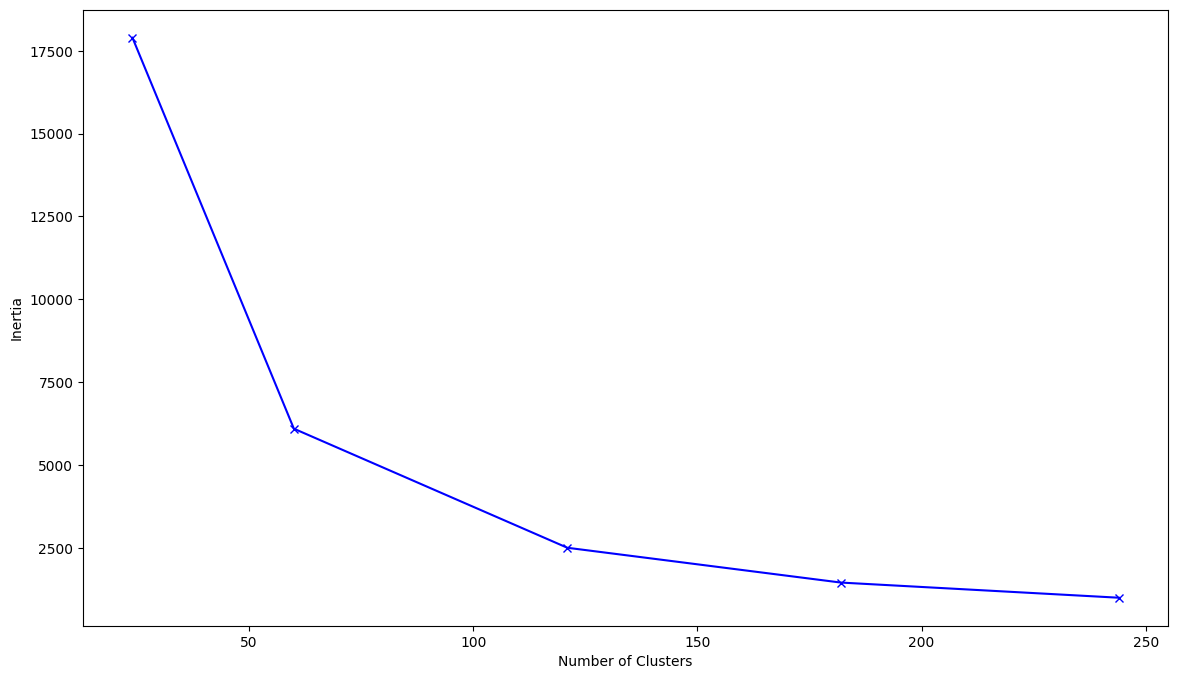

In [18]:
m.plot_selection_metric(metric = 'inertia')

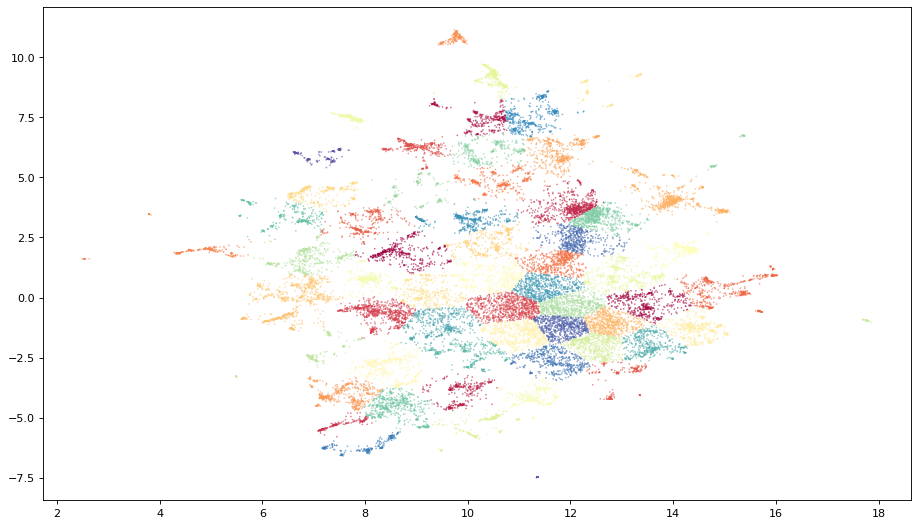

In [19]:
m.plot_clusters(path = '/content/clusters.pdf')

In [20]:
m.clusters_to_txt(path = '/content/clusters.txt')

In [ ]:
narratives = m.predict(postproc_roles, progress_bar = True)


Predicting entities for role: ARG0...
Computing phrase embeddings...


100%|██████████| 50388/50388 [14:01<00:00, 59.90it/s]


Matching known entities (with embeddings distance)...
Matching unknown entities (with clustering model)...
Dimension reduction of vectors (PCA)...
Dimension reduction of vectors (UMAP)...
Assignment to clusters...

Predicting entities for role: ARG1...
Computing phrase embeddings...


 12%|█▏        | 6032/49026 [01:40<10:51, 66.02it/s]

In [ ]:
from relatio.utils import prettify

pretty_narratives = []
for n in narratives:
    pretty_narratives.append(prettify(n))

for i in range(10):
    print(roles[i])
    print(postproc_roles[i])
    print(pretty_narratives[i])

In [ ]:
from relatio import build_graph, draw_graph

G = build_graph(
    narratives,
    top_n = 100,
    prune_network = True
)

draw_graph(
    G,
    notebook = True,
    show_buttons = False,
    width="1600px",
    height="1000px",
    output_filename = '/content/network_of_narratives.html'
    )

In [ ]:
import pickle as pk

with open('/content/narrative_model.pkl','wb') as f:
    pk.dump(m,f)

In [ ]:
with open('/content/narrative_model.pkl','rb') as f:
    m = pk.load(f)